In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

In [ ]:
!kaggle datasets download -d zalando-research/fashionmnist

Dataset URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist
License(s): other
fashionmnist.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
# Path to the zip file
zip_file_path = "fashionmnist.zip"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("/content/Fashion_mnist")

In [ ]:
df = pd.read_csv("/content/Fashion_mnist/fashion-mnist_train.csv")
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.keys()

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [ ]:
X = df.drop('label', axis=1)
X = X.values.reshape(60000, 28, 28, 1)
X = X / 255.0
y = df['label']
y = y.values.reshape(60000, 1)
y = y / 255.0

In [ ]:
X.shape

(60000, 28, 28, 1)

In [ ]:
y.shape

(60000, 1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
x_train
x_train.shape

(48000, 28, 28, 1)

In [ ]:
y_train
y_train.shape

(48000, 1)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU, Dropout

model = Sequential()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.add(layers.Input(shape=(28, 28, 1)))

# First convolutional block
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional block
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the feature maps
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

# Output layer
num_classes = 10
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_28 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 1, 1, 128)       

In [ ]:
model.fit(X,y,epochs=6,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/6
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0063 - accuracy: 0.1000 - val_loss: 5.9605e-10 - val_accuracy: 0.1027
Epoch 2/6
1875/1875 [==============================] - 19s 10ms/step - loss: 3.4978e-08 - accuracy: 0.1000 - val_loss: 2.0862e-10 - val_accuracy: 0.1027
Epoch 3/6
1875/1875 [==============================] - 18s 10ms/step - loss: 1.6762e-08 - accuracy: 0.1000 - val_loss: 5.9605e-11 - val_accuracy: 0.1027
Epoch 4/6
1875/1875 [==============================] - 19s 10ms/step - loss: 1.2733e-08 - accuracy: 0.1000 - val_loss: 1.9868e-11 - val_accuracy: 0.1027
Epoch 5/6
1875/1875 [==============================] - 19s 10ms/step - loss: 3.3299e-09 - accuracy: 0.1000 - val_loss: 0.0000e+00 - val_accuracy: 0.1027
Epoch 6/6
1875/1875 [==============================] - 18s 10ms/step - loss: 1.0112e-08 - accuracy: 0.1000 - val_loss: 0.0000e+00 - val_accuracy: 0.1027


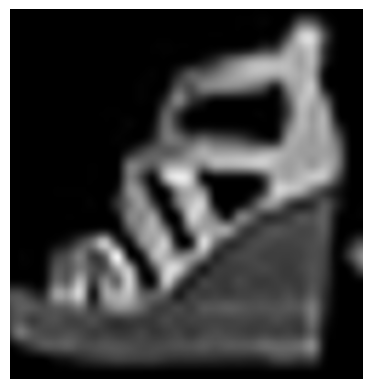

1/1 [==============================] - 0s 34ms/step


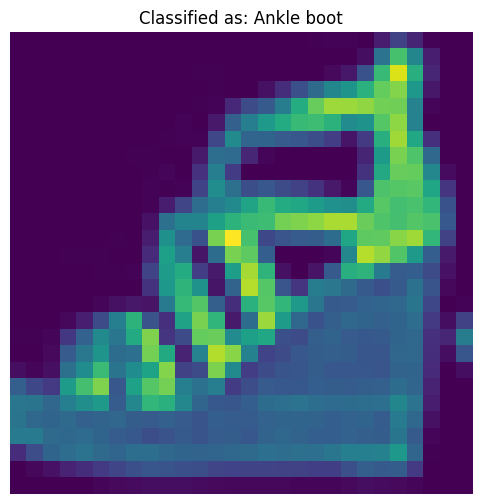

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io

image_bytes = open("OneDrive/Pictures/Screenshots/Screenshot 2024-10-20 143318.png", 'rb').read()
image = Image.open(io.BytesIO(image_bytes))
plt.imshow(image)  # Display the image using PIL's Image.open
plt.axis('off')
plt.show()
# Define the class names (replace with your actual class names)
class_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

def preprocess_image(image_bytes):
    """Preprocesses the uploaded image for prediction."""

    # Decode the image from bytes
    image = Image.open(io.BytesIO(image_bytes))

    # Convert to grayscale
    image = image.convert('L')

    # Resize to 28x28
    image = image.resize((28, 28))

    # Convert to numpy array and normalize
    image_array = np.array(image)
    image_array = image_array / 255.0

    # Add batch dimension
    image_array = np.expand_dims(image_array, axis=0)
    image_array = np.expand_dims(image_array, axis=-1)

    return image_array


image_array = preprocess_image(image_bytes)

pred = model.predict(image_array)

plt.figure(figsize=(12, 6))

plt.imshow(image_array[0]) # Display the single image
plt.title(f"Classified as: {class_names[np.argmax(pred[0])]}")
plt.axis('off')

plt.show()